# ANALISIS DE MUSICA


## Aprendizaje Automático

Cynthia Gonzalez | Michel Maris

In [23]:
# !pip install kagglehub

In [24]:
import kagglehub
import pandas as pd
import numpy as np

In [25]:
dataset_path = kagglehub.dataset_download("brendanartley/lumbar-coordinate-pretraining-dataset")
lumbarcoordinate_df = pd.read_csv(dataset_path + "\\coords_rsna_improved.csv")

In [26]:
#lumbarcoordinate_df.set_index("filename", inplace=True)
display(lumbarcoordinate_df)

,Unnamed: 0,series_id,relative_x,relative_y,condition,side,instance_number,study_id,level
0,0,10996,0.521148,0.325282,Left Neural Foraminal Narrowing,L,13,3996069892,L1/L2
1,1,10996,0.516856,0.319701,Right Neural Foraminal Narrowing,R,6,3996069892,L1/L2
2,2,10996,0.493773,0.400966,Left Neural Foraminal Narrowing,L,12,3996069892,L2/L3
3,3,10996,0.504032,0.385531,Right Neural Foraminal Narrowing,R,6,3996069892,L2/L3
4,4,10996,0.487331,0.475040,Left Neural Foraminal Narrowing,L,12,3996069892,L3/L4
...,...,...,...,...,...,...,...,...,...
58730,58730,4294540297,0.511282,0.571751,Spinal Canal Stenosis,R,10,916362094,L3/L4
58731,58731,4294540297,0.308594,0.667969,Spinal Canal Stenosis,L,-1,916362094,L4/L5
58732,58732,4294540297,0.516697,0.671029,Spinal Canal Stenosis,R,9,916362094,L4/L5
58733,58733,4294540297,0.328125,0.796875,Spinal Canal Stenosis,L,-1,916362094,L5/S1


In [28]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit(lumbarcoordinate_df[["level"]])


encoded = enc.transform(lumbarcoordinate_df[["level"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(["level"]))
lumbarcoordinate_df = pd.concat([lumbarcoordinate_df.drop(columns=["level"]), encoded_df], axis=1)

enc.fit(lumbarcoordinate_df[["side"]])
encoded = enc.transform(lumbarcoordinate_df[["side"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(["side"]))
lumbarcoordinate_df = pd.concat([lumbarcoordinate_df.drop(columns=["side"]), encoded_df], axis=1)

display(lumbarcoordinate_df)

,Unnamed: 0,series_id,relative_x,relative_y,condition,instance_number,study_id,level_L1/L2,level_L2/L3,level_L3/L4,level_L4/L5,level_L5/S1,side_L,side_R
0,0,10996,0.521148,0.325282,Left Neural Foraminal Narrowing,13,3996069892,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,10996,0.516856,0.319701,Right Neural Foraminal Narrowing,6,3996069892,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,10996,0.493773,0.400966,Left Neural Foraminal Narrowing,12,3996069892,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,10996,0.504032,0.385531,Right Neural Foraminal Narrowing,6,3996069892,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,10996,0.487331,0.475040,Left Neural Foraminal Narrowing,12,3996069892,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58730,58730,4294540297,0.511282,0.571751,Spinal Canal Stenosis,10,916362094,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58731,58731,4294540297,0.308594,0.667969,Spinal Canal Stenosis,-1,916362094,0.0,0.0,0.0,1.0,0.0,1.0,0.0
58732,58732,4294540297,0.516697,0.671029,Spinal Canal Stenosis,9,916362094,0.0,0.0,0.0,1.0,0.0,0.0,1.0
58733,58733,4294540297,0.328125,0.796875,Spinal Canal Stenosis,-1,916362094,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Index(['Unnamed: 0', 'series_id', 'relative_x', 'relative_y',
       'instance_number', 'study_id', 'level_L1/L2', 'level_L2/L3',
       'level_L3/L4', 'level_L4/L5', 'level_L5/S1', 'side_L', 'side_R'],
      dtype='object')


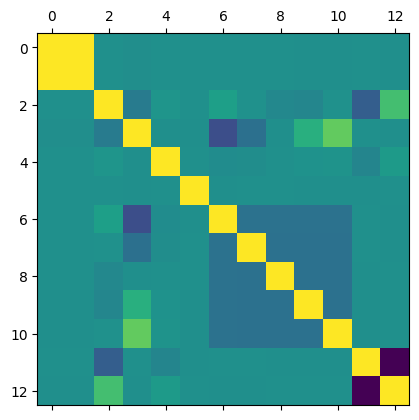

In [30]:
import matplotlib.pyplot as plt

correlation_matrix = lumbarcoordinate_df.corr(numeric_only=True)

print(correlation_matrix.columns)

plt.matshow(correlation_matrix)
plt.show()


#X = lumbarcoordinate_df[["level_L5/S1"]]
#y = lumbarcoordinate_df[["y"]]
#plt.scatter(X,y,s=20)
